helloo


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
#matplotlib inline


df = pd.read_csv('sales.csv')
print(df.head())

     Month  Perrin Freres monthly champagne sales millions ?64-?72
0  1964-01                                               2815     
1  1964-02                                               2672     
2  1964-03                                               2755     
3  1964-04                                               2721     
4  1964-05                                               2946     


In [28]:
#print("hello")
print(df.tail())
#df.tail()

       Month  Perrin Freres monthly champagne sales millions ?64-?72
100  1972-05                                               4618     
101  1972-06                                               5312     
102  1972-07                                               4298     
103  1972-08                                               1413     
104  1972-09                                               5877     


In [29]:
df.columns = ["Month","Sales"]
print(df.head())

     Month  Sales
0  1964-01   2815
1  1964-02   2672
2  1964-03   2755
3  1964-04   2721
4  1964-05   2946


In [30]:
df['Month'] = pd.to_datetime(df['Month'])
print(df.head())

       Month  Sales
0 1964-01-01   2815
1 1964-02-01   2672
2 1964-03-01   2755
3 1964-04-01   2721
4 1964-05-01   2946


In [31]:
df.set_index('Month',inplace=True)
print(df.head())

            Sales
Month            
1964-01-01   2815
1964-02-01   2672
1964-03-01   2755
1964-04-01   2721
1964-05-01   2946


In [32]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


# Step 2: Visualization the data

<Axes: xlabel='Month'>

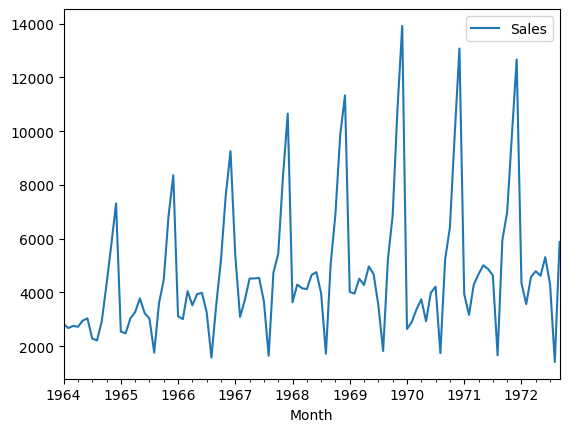

In [33]:
# Step 2: Visualize the data
df.plot()

In [34]:
### Testing for stationary though it is seasonal data
from statsmodels.tsa.stattools import adfuller

In [35]:
test_result = adfuller(df['Sales'])

In [36]:
#H0: It is non_stationary
#H1: It is stationary
# df should be stationary

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test statistics','p-value','#lags used','Number of observations used']
    for value,label in zip(result,labels):
        print(label+' : ' + str(value) )
        #print(result[1])
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis,reject H0")
    else:
        print("weak evidence against null hypothesis,time series has a unit root,indicating it is a non-stationary ")
        

In [37]:
adfuller_test(df['Sales'])

ADF Test statistics : -1.8335930563276195
p-value : 0.3639157716602467
#lags used : 11
Number of observations used : 93
weak evidence against null hypothesis,time series has a unit root,indicating it is a non-stationary 


## Differncing

In [38]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [39]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [40]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [41]:
df['Seasonal First Difference'] = df['Sales'] - df['Sales'].shift(12)

In [42]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815,NaN,NaN
1964-02-01,2672,-143.0,NaN
1964-03-01,2755,83.0,NaN
1964-04-01,2721,-34.0,NaN
1964-05-01,2946,225.0,NaN
1964-06-01,3036,90.0,NaN
1964-07-01,2282,-754.0,NaN
1964-08-01,2212,-70.0,NaN
1964-09-01,2922,710.0,NaN


In [43]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test statistics : -7.626619157213166
p-value : 2.0605796968136632e-11
#lags used : 0
Number of observations used : 92
strong evidence against the null hypothesis,reject H0


<Axes: xlabel='Month'>

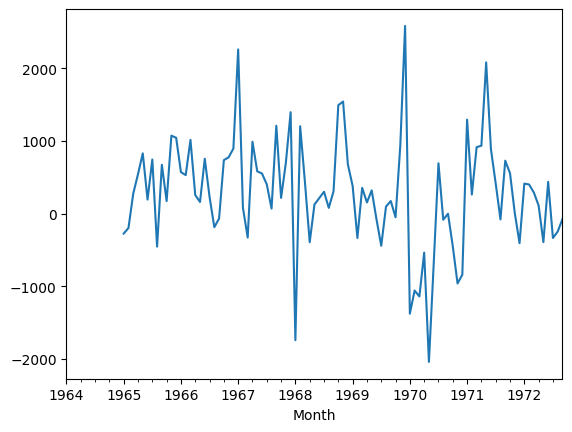

In [44]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model

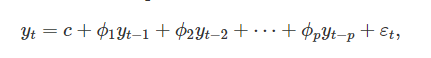

In [45]:
# from pandas.tools.plotting import autocorrelation_plot
# autocorrelation_plot(df['Sales'])
# plt.show()

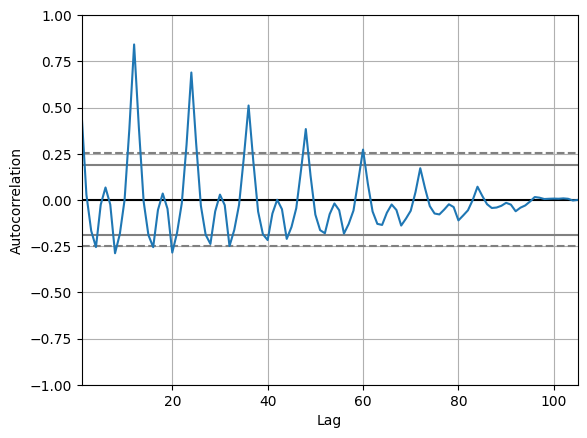

In [46]:
# from pandas.plotting import autocorrelation_plot
# import matplotlib.pyplot as plt

pd.plotting.autocorrelation_plot(df['Sales'])
plt.show()

#pd.autocorrelation_plot(df['Sales'])
#plt.show()


#### Final thoughts on Autocorrleation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
  *
For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as predictor.

* .
Identification of an MA model is often best done with the ACF rather than tPACF.C  *.

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the mo
    del.

    p,d,q p AR model
     lags d differe
    ncing q MA lags



In [47]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

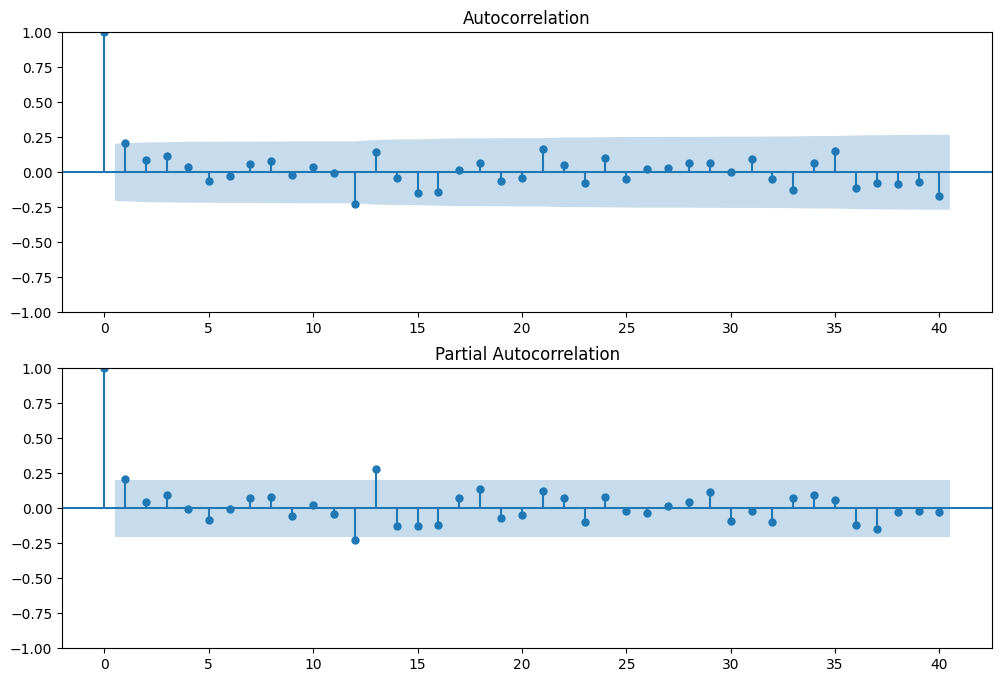

In [48]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags = 40,ax=ax2)
#fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)
plt.show()

In [49]:
#pip install pmdarima
#import pmdarima as pm

#!pip install pmdarima
#! pip install pmdarima --user
#python -m pip install --user pmdarima

# #%pip install pmdarima
# !pip install --upgrade pip

In [51]:
# For non-seasonal data
#p=1 , d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima

from pmdarima import auto_arima







In [ ]:
# train_size = int(len(df['Sales']) * 0.85)
# train = df.Sales[:train_size]

# model = ARIMA(df['Sales'],order = (1,1,1))
# model_fit = model.fit()

autoarima_model = auto_arima(df['Sales'] ,trace=True)
print(autoarima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.82 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1937.732, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1938.874, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1937.889, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1935.750, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.87 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.148 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  105
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -966.875
Date:                Mon, 15 Jan 2024   AIC                           1935.750
Time:                        21:25:29   BIC                           1938.394
Sample:                    01-01-1964   HQIC                          1936.821
                    

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results = model.fit()

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

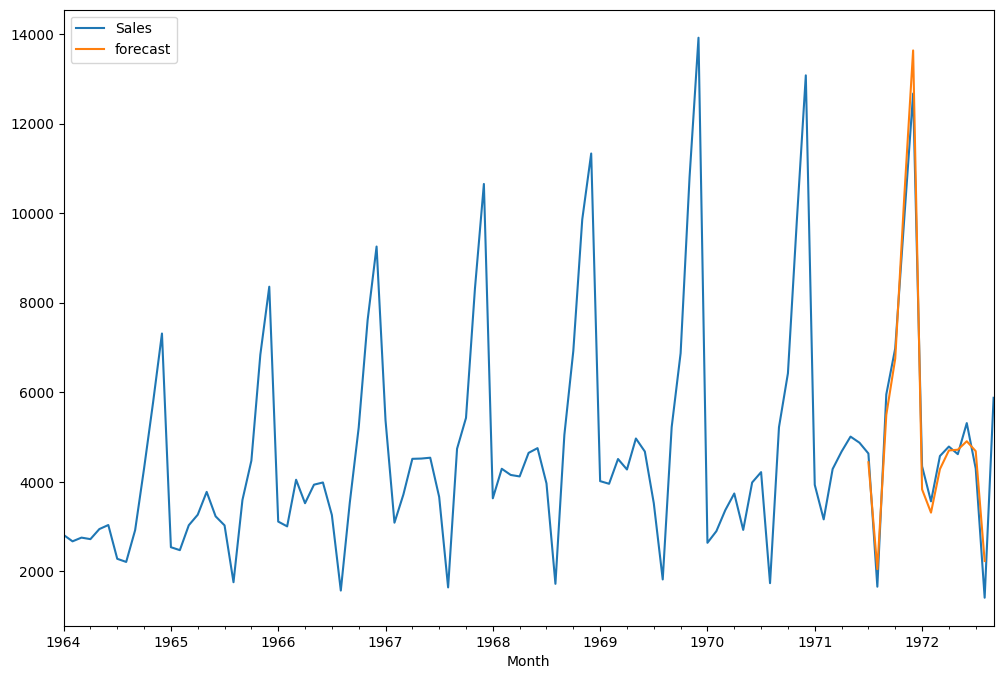

In [ ]:
df['forecast'] = results.predict(start = 90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [ ]:
future_dataset_df = pd.date_range(start='1972-09-01',end='1974-09-01',freq='MS')
future_dataset_df = pd.DataFrame(index=future_dataset_df[0:])

In [ ]:
future_dataset_df['forecast'] = results.predict(start=104,end=120,dynamic = True)

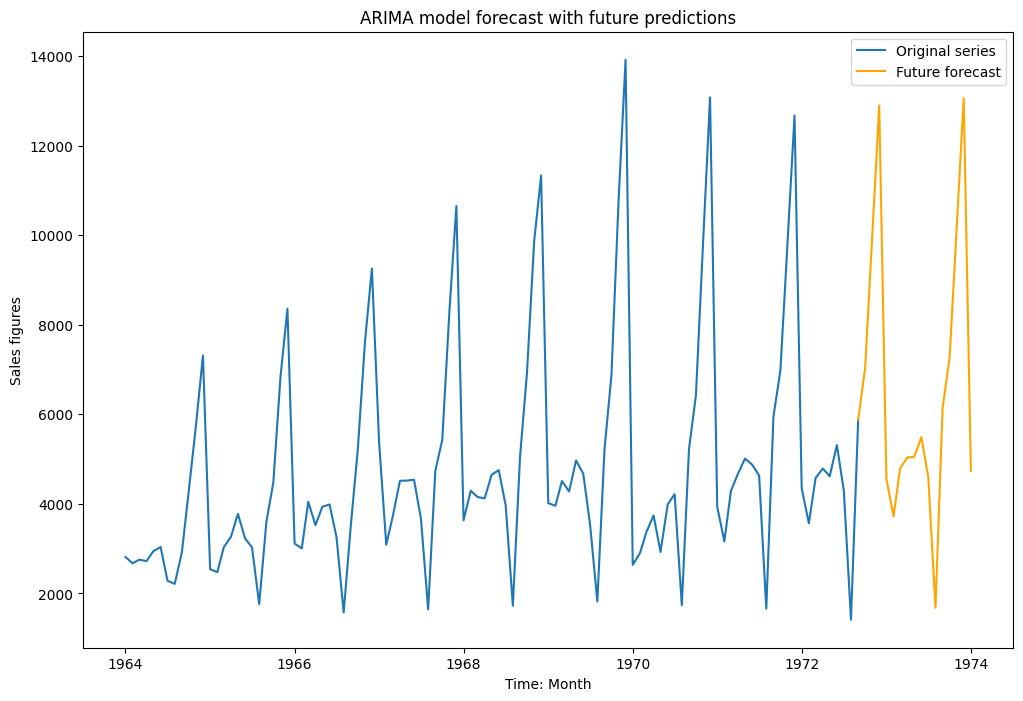

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(df['Sales'],label = 'Original series')
plt.plot(future_dataset_df['forecast'],color='orange',label='Future forecast')
plt.title('ARIMA model forecast with future predictions')
plt.xlabel('Time: Month')
plt.ylabel('Sales figures')
plt.legend()
plt.show()